In [3]:
from sklearn.datasets import load_boston
data = load_boston(return_X_y=False)


In [37]:
import numpy as np

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('housing.csv')

In [8]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


$MEDV = w_1 x RM + w_2x LSTAT + w_3 x PTRATIO + w_0$

In [10]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


array([[<AxesSubplot:title={'center':'MEDV'}>]], dtype=object)

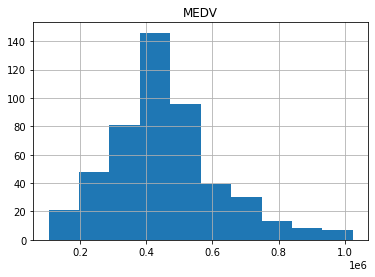

In [13]:
df.hist(column='MEDV')

In [16]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
X = df[df.columns[:3]].values

In [20]:
y = df[df.columns[3]].values

In [67]:
scalerMinMax = MinMaxScaler()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7)

In [69]:
X_train_ = scalerMinMax.fit_transform(X_train)

In [57]:
from sklearn.linear_model import LinearRegression 

In [70]:
lrg = LinearRegression()

In [71]:
lrg.fit(X_train_, y_train)

LinearRegression()

In [72]:
X_test_ = scalerMinMax.transform(X_test)

In [74]:
y_pred = lrg.predict(X_test_)

In [78]:
mean_squared_error(y_test,y_pred)

7392207088.444706

In [83]:
import matplotlib.pyplot as plt

(array([ 5., 18., 22., 46., 31., 10.,  7.,  2.,  3.,  3.]),
 array([ 105000.,  196980.,  288960.,  380940.,  472920.,  564900.,
         656880.,  748860.,  840840.,  932820., 1024800.]),
 <BarContainer object of 10 artists>)

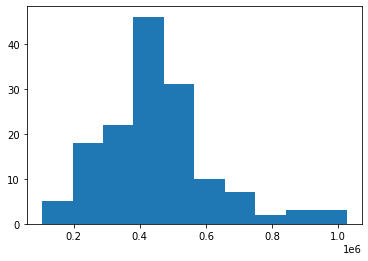

In [84]:
plt.hist(y_test)

(array([ 2.,  4.,  5., 11., 22., 35., 29., 23., 11.,  5.]),
 array([-47830.92402202,  37782.64510201, 123396.21422604, 209009.78335006,
        294623.35247409, 380236.92159812, 465850.49072215, 551464.05984617,
        637077.6289702 , 722691.19809423, 808304.76721825]),
 <BarContainer object of 10 artists>)

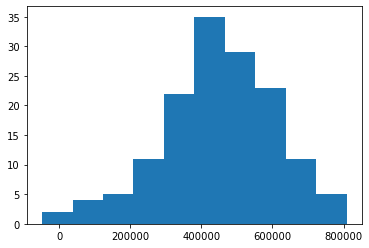

In [85]:
plt.hist(y_pred)

In [79]:
mean_absolute_error(y_test, y_pred)

62077.56308037721

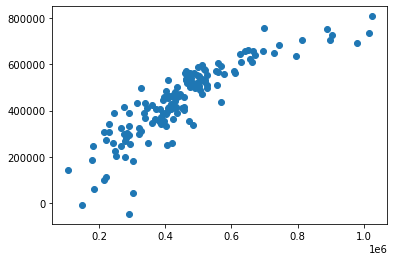

In [86]:
plt.scatter(y_test,y_pred)

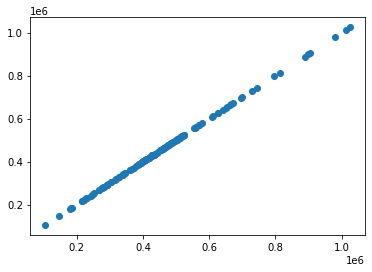

In [87]:
plt.scatter(y_test,y_test)

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scalerStd = StandardScaler()

In [90]:
X_train_2 = scalerStd.fit_transform(X_train)

In [91]:
lrg2 = LinearRegression()

In [92]:
lrg2.fit(X_train_2, y_train)

LinearRegression()

In [93]:
X_test_2 = scalerStd.transform(X_test)

In [95]:
y_pred2 = lrg2.predict(X_test_2)

In [96]:
mean_squared_error(y_test,y_pred2)

7392207088.444699

In [97]:
mean_absolute_error(y_test,y_pred2)

62077.56308037721

In [98]:
from sklearn.linear_model import SGDRegressor

In [113]:
sgd1 = SGDRegressor(random_state=13)

In [114]:
sgd1.fit(X_train_, y_train)

SGDRegressor(random_state=13)

In [115]:
y_pred  = sgd1.predict(X_test_ )

In [116]:
mean_absolute_error(y_test, y_pred)

59887.431278124146

In [118]:
mean_squared_error(y_test, y_pred)

6984951850.905853

In [124]:
sgd1 = SGDRegressor(random_state=13)

In [125]:
sgd1.fit(X_train_2, y_train)

SGDRegressor(random_state=13)

In [126]:
y_pred  = sgd1.predict(X_test_2 )

In [127]:
mean_absolute_error(y_test, y_pred)

61904.5503757372

In [128]:
mean_squared_error(y_test, y_pred)

7355806261.347042

In [130]:
mean_squared_error(y_test, y_pred)**(1/2)

85765.99711626422

In [131]:
scalerY = StandardScaler()

In [140]:
y_train_ = y_train.reshape(y_train.shape[0], 1)

In [135]:
y_test_ = y_test.reshape(y_test.shape[0], 1)

In [141]:
y_train_scl = scalerY.fit_transform(y_train_)

In [142]:
y_test_scl = scalerY.transform(y_test_)

In [138]:
sgd_ = SGDRegressor()

In [145]:
sgd_.fit(X_train_2, y_train_scl.reshape(y_train.shape[0],))

SGDRegressor()

In [146]:
Y_pred_scl = sgd_.predict(X_test_2)

In [150]:
y_pred = scalerY.inverse_transform(Y_pred_scl.reshape(Y_pred_scl.shape[0], 1))

In [151]:
mean_squared_error(y_pred, y_test)

7291889239.133991

In [152]:
mean_absolute_error(y_pred, y_test)

61639.77205547261

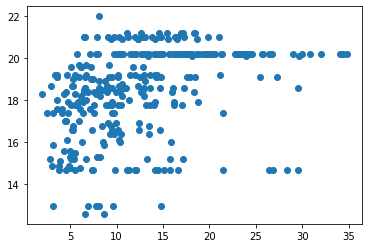

In [154]:
plt.scatter(X_train[:,1],X_train[:,2])

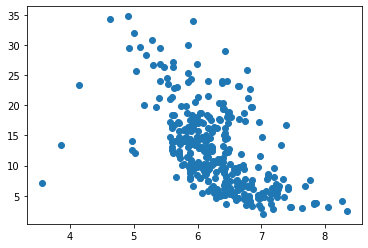

In [155]:
plt.scatter(X_train[:,0],X_train[:,1])